In [1]:
pip install xgboost


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import warnings
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
!pip3 install catboost
from catboost import CatBoostClassifier


     |████████████████████████████████| 69.2MB 60kB/s 


### **1. Data exploration**

**Read dataset and Create data frame**

In [7]:
#Creating a dataframe
df = pd.read_csv('/content/drive/MyDrive/BigData/weatherAUS.csv')

**Checking first 5 rows**

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Shape of DataFrame**

In [9]:
print(f'The number of rows are {df.shape[0] }')
print(f'The number of columns are {df.shape[1] }')

The number of rows are 145460
The number of columns are 23


**Describing the attributes**

In [10]:
df.info()
#6 columns are of type 'object' and remaining of 'float'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Description of data**

In [11]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Showing if in this data null columns**

In [12]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Get number of unique value in each column**

In [13]:
df.nunique()


Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

**Precentage of rain and not rain**

In [15]:
df.RainTomorrow.value_counts(normalize=True)
# 77.5% data have no rain

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

### **2.Data Visualization**

**Count of rain today and tomorrow**

No     110319
Yes     31880
Name: RainToday, dtype: int64
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


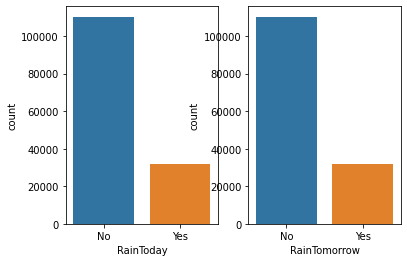

<Figure size 1440x1440 with 0 Axes>

In [16]:
fig, ax =plt.subplots(1,2)
print(df.RainToday.value_counts())
print(df.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])
#It is obvious that when it rain today it will most probably rain tomorrow 

**Direction of wind at 9 am, 3 pm and windGistDir**

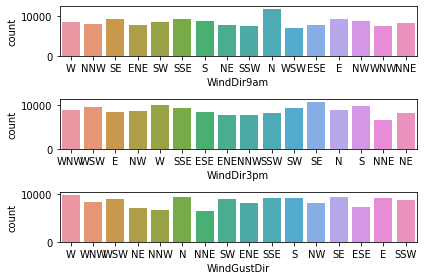

<Figure size 720x720 with 0 Axes>

In [17]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

#Wind at 9 am is highest at direction N.
#Wind at 3 pm is highest at direction SE.
#WindGustDir is highest at direction W.

**Location**



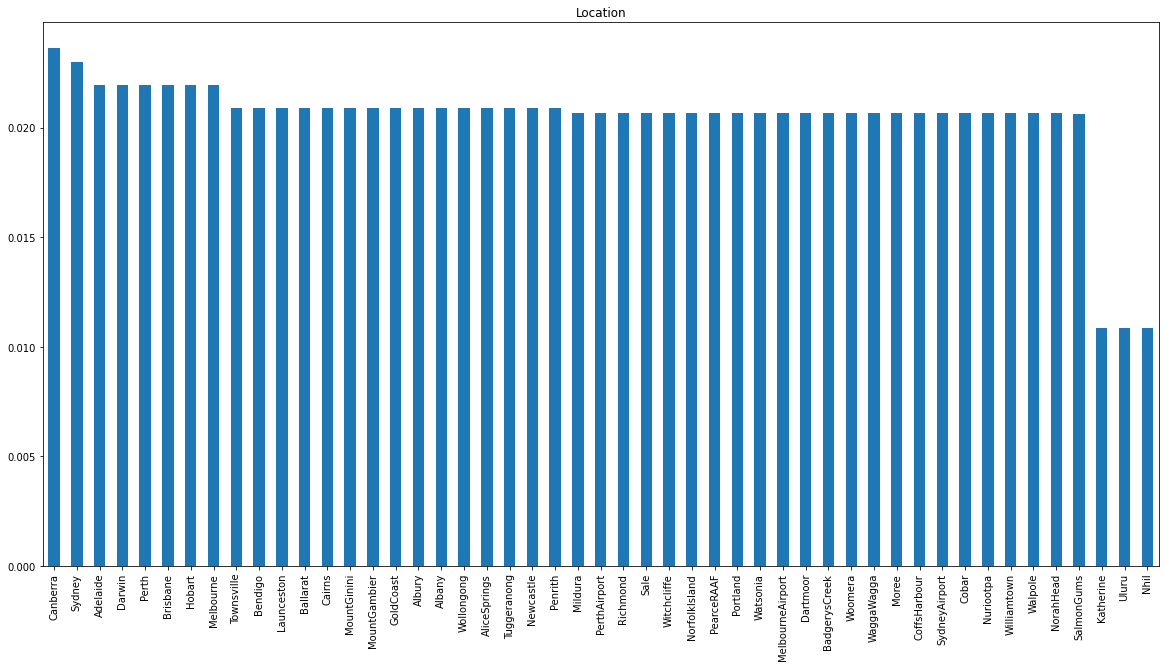

In [18]:
df['Location'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Location')
plt.show()
#The highst location is canbirra


**Distribution plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

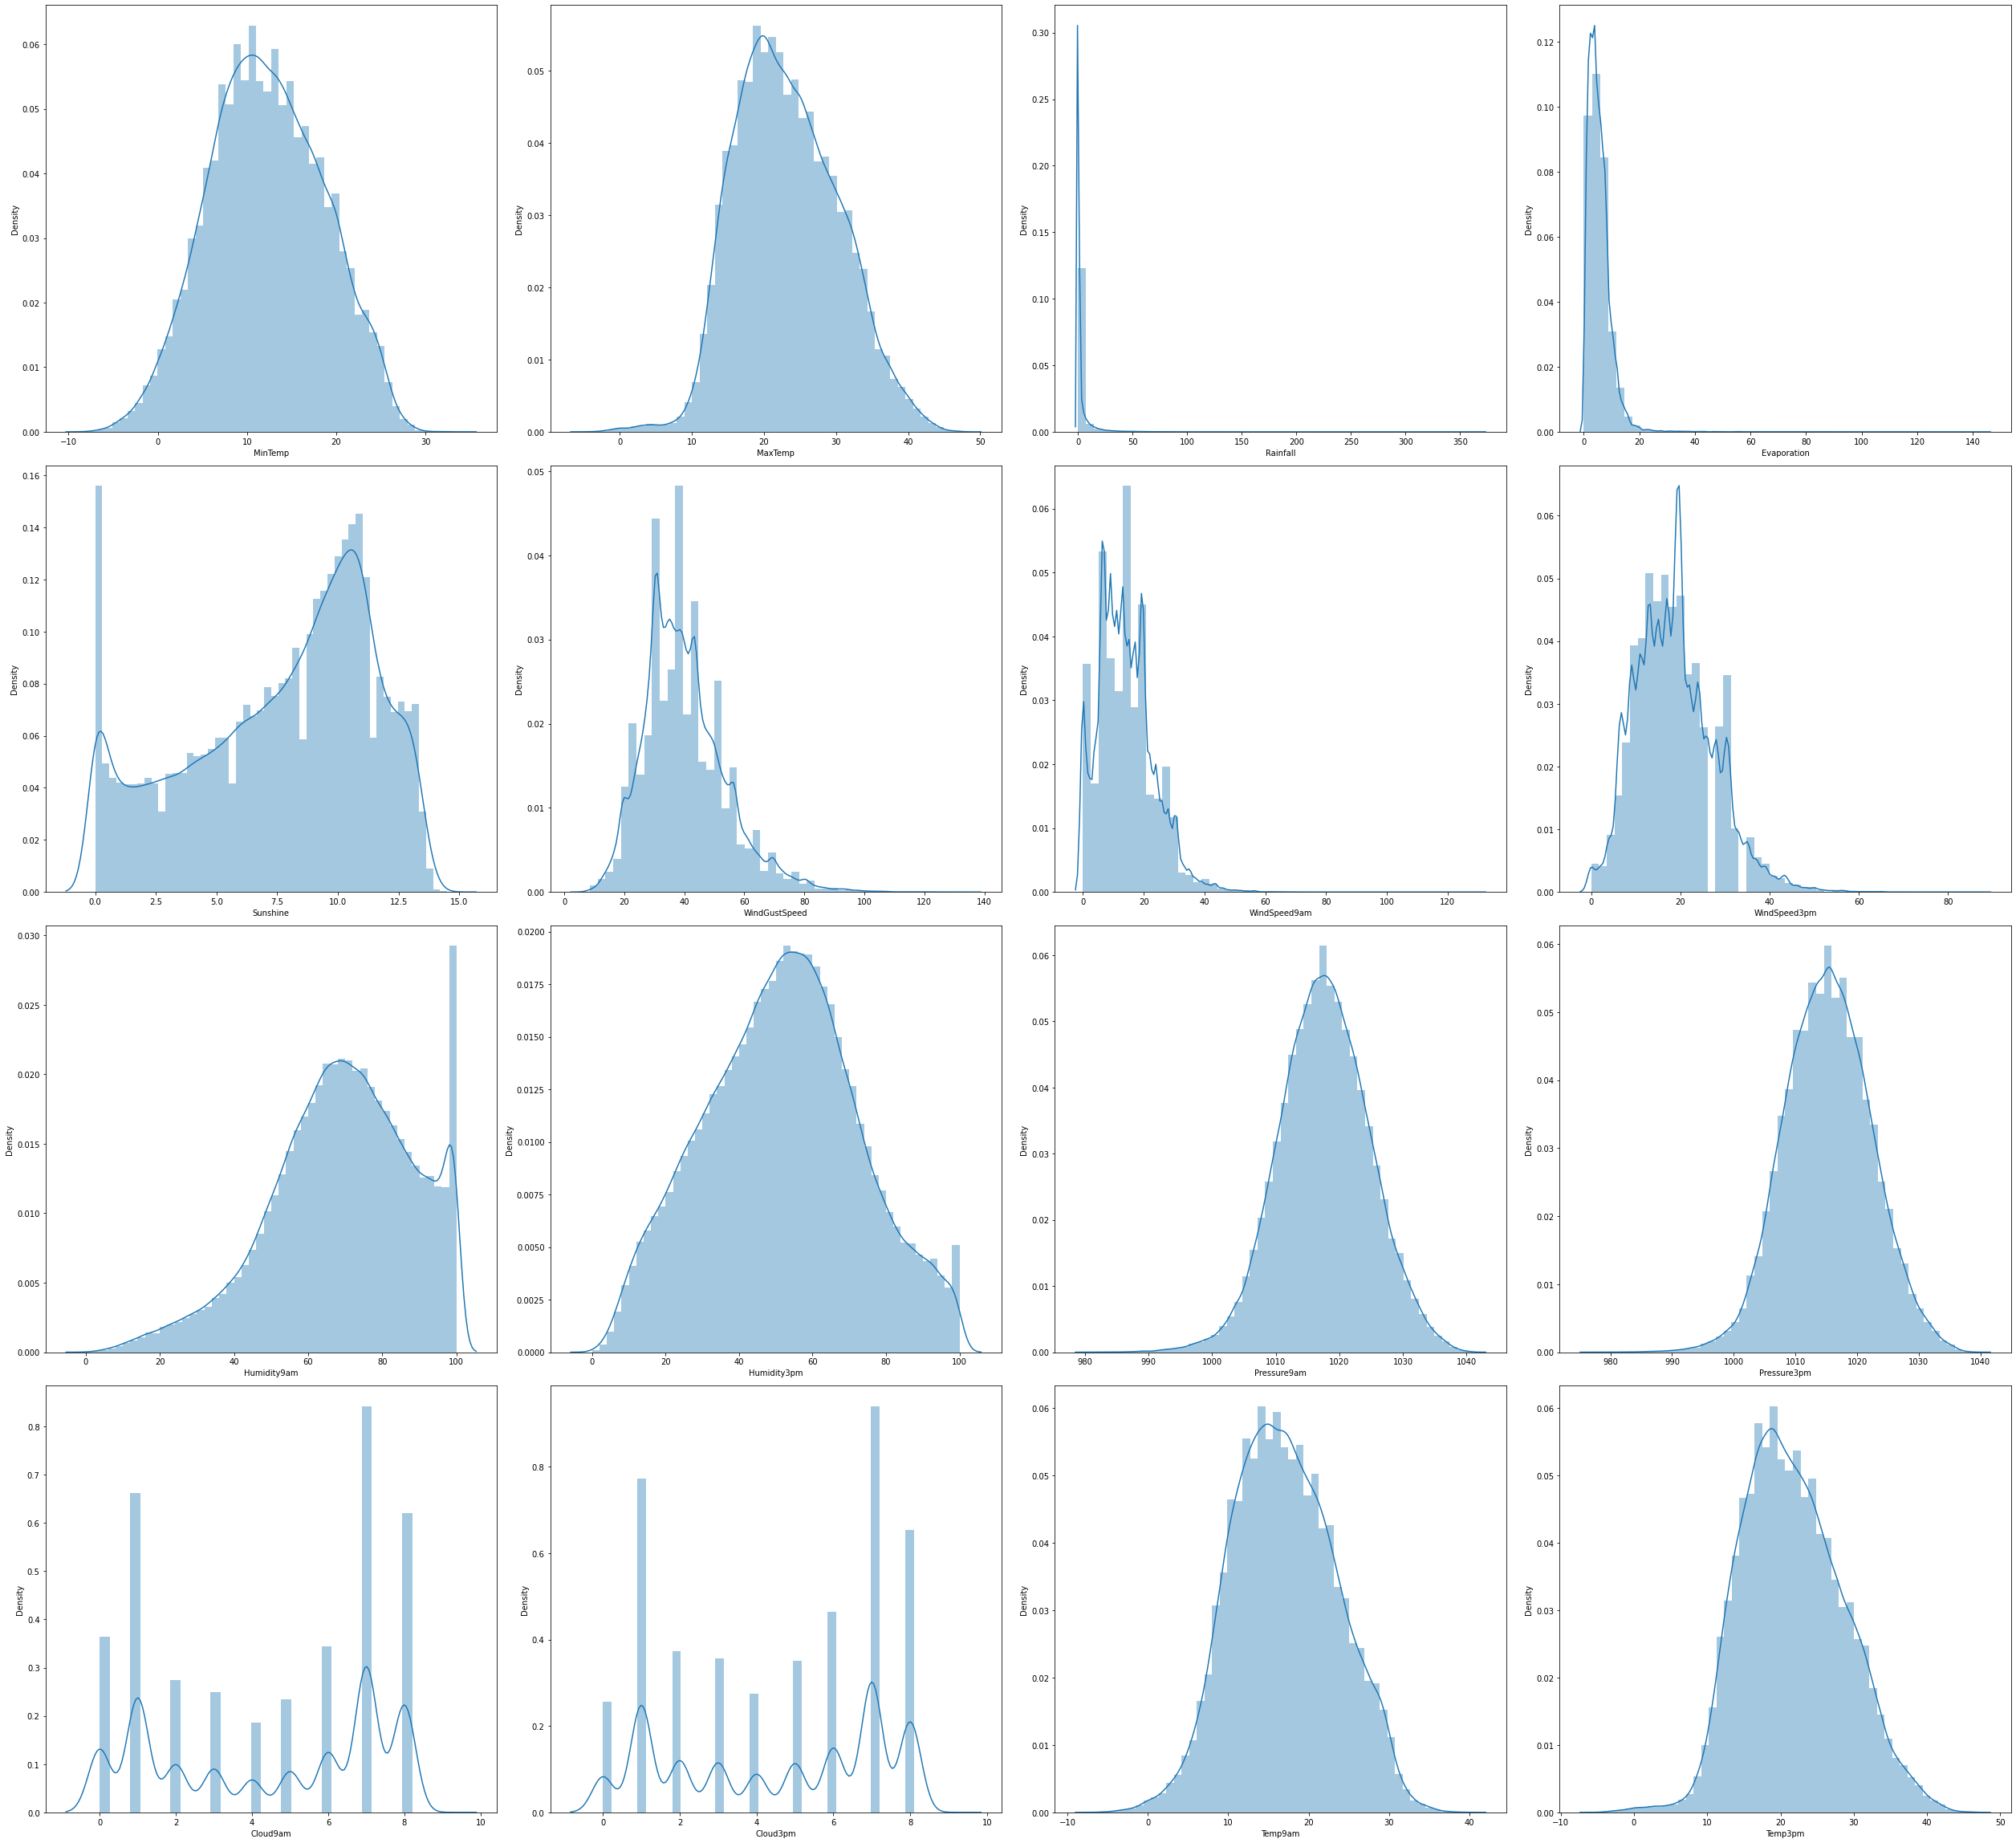

In [19]:
#  plot Numerical Data
r = 4  
c = 4  
counter = 1  
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(r, c, counter)
        sns.distplot(df[i])
        counter = counter+1
    else:
        continue
plt.tight_layout()
plt.show()  

**Date Plot**

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

We are going to plot features with datetime. Here, I am going to use date from last 3 years.



**MinTemp and MaxTemp**

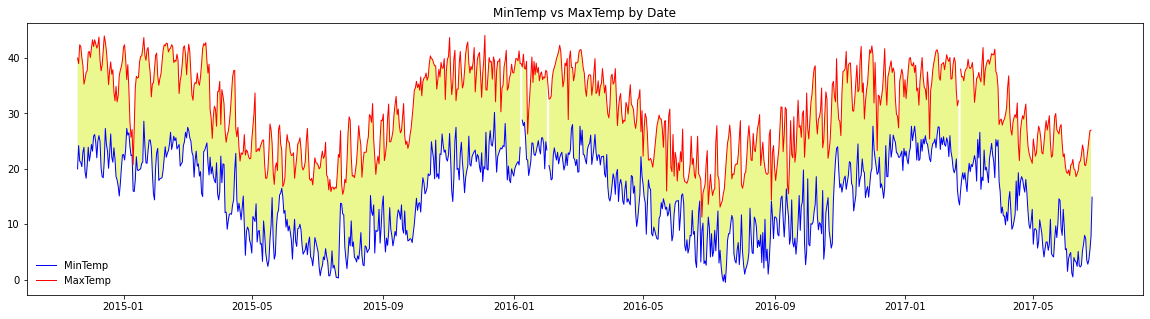

In [21]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()
# The plot shows that the MinTemp and MaxTemp relatively increases and decreases every year.
# The weather conditions are always opposite in the two hemispheres. As Australia is situated in the southern hemisphere. The seasons are bit different.
# As you can see that, December to February is summer; March to May is autumn; June to August is winter; and September to November is spring.

**RainFall**

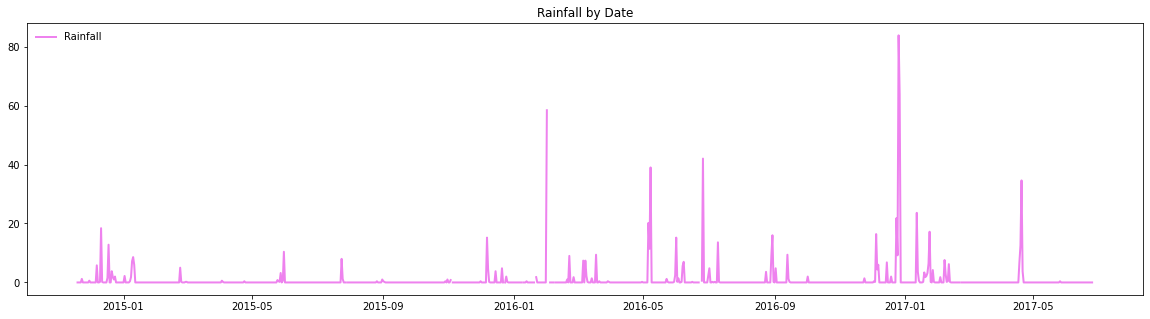

In [22]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Rainfall'],color='violet', linewidth=2, label= 'Rainfall')
plt.legend(loc='upper left', frameon=False)
plt.title('Rainfall by Date')
plt.show()
# Being situated in southern hemisphere, the majority of rainfall occurs between December and March.
# We can see that Dec-Jan does get a lot of rainfall but there are months like Jun-Jul when rainfall occurs too.

**WindGustSpeed** 

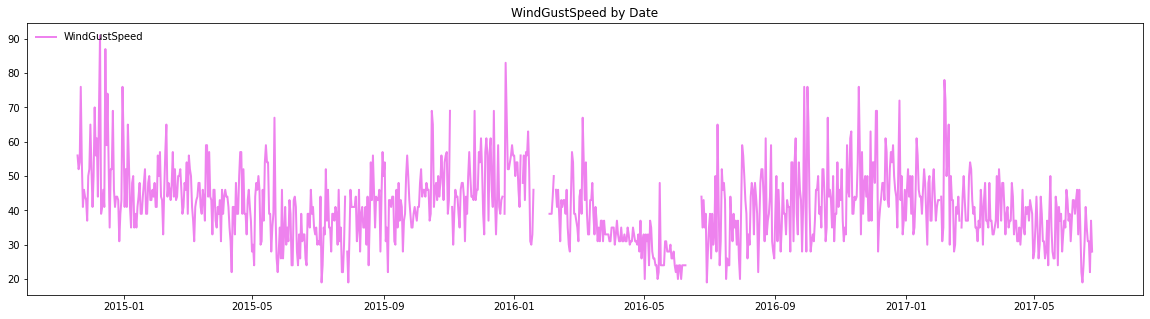

In [23]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['WindGustSpeed'],color='violet', linewidth=2, label= 'WindGustSpeed')
plt.legend(loc='upper left', frameon=False)
plt.title('WindGustSpeed by Date')
plt.show()
# In Australia wind speed is usually moderate. But from above plot we can see that Dec-Feb is the windiest months.


**WindSpeed9am and WindSpeed3pm**

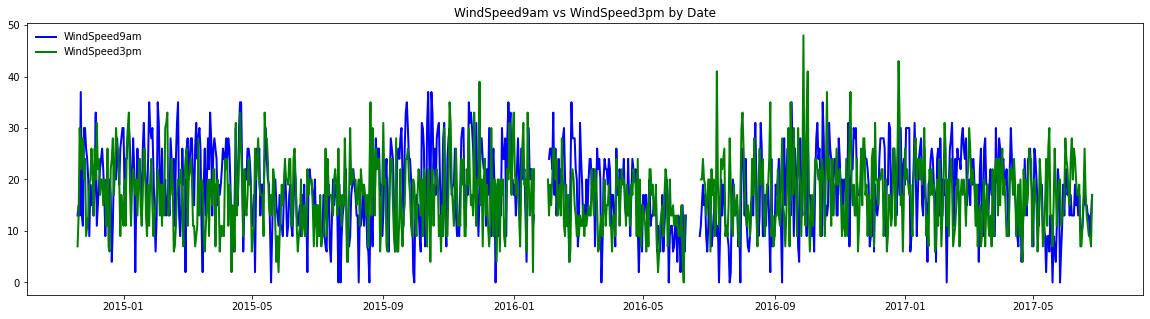

In [24]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['WindSpeed9am'],color='blue', linewidth=2, label= 'WindSpeed9am')
plt.plot(df_dateplot['Date'],df_dateplot['WindSpeed3pm'],color='green', linewidth=2, label= 'WindSpeed3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('WindSpeed9am vs WindSpeed3pm by Date')
plt.show()
# WindSpeed9am and WindSpeed3pm are relatively same around certain months.



**Humidity9am and Humidity3pm**

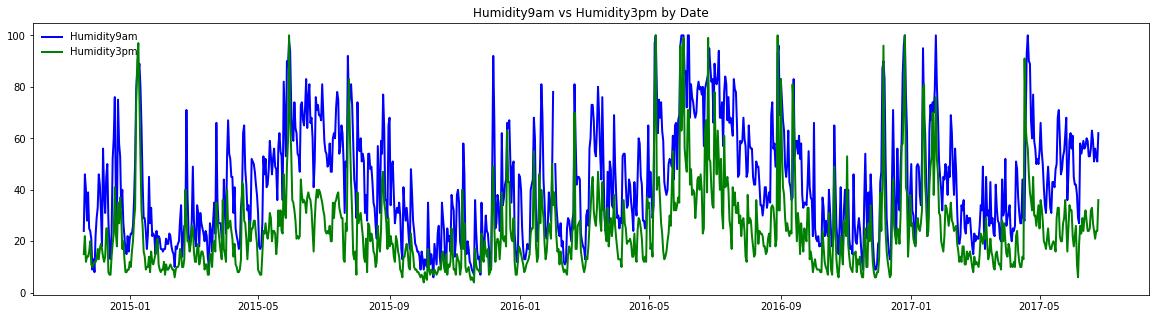

In [25]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue', linewidth=2, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='green', linewidth=2, label= 'Humidity3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('Humidity9am vs Humidity3pm by Date')
plt.show()
# From the plot we can see that the Humidity is high around Jun-Jul and also during that time, there is good difference between humidity around 9am and 3pm.



**Pressure9am and Pressure3am**

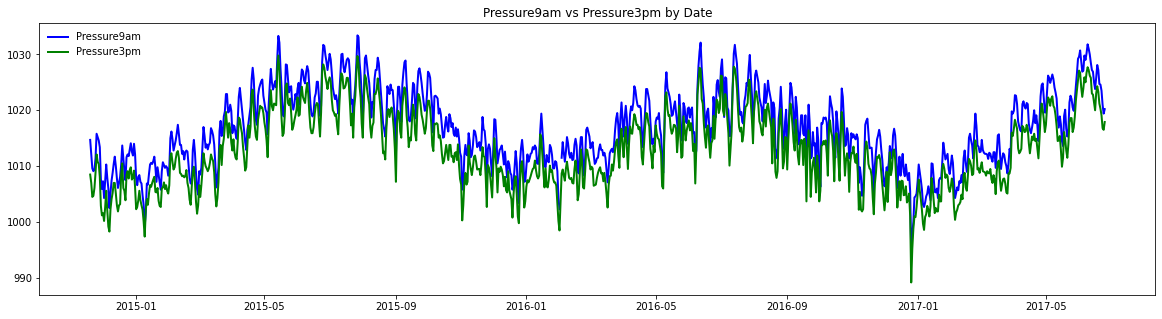

In [26]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Pressure9am'],color='blue', linewidth=2, label= 'Pressure9am')
plt.plot(df_dateplot['Date'],df_dateplot['Pressure3pm'],color='green', linewidth=2, label= 'Pressure3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('Pressure9am vs Pressure3pm by Date')
plt.show()
# Pressure is high around the months of Jun-Aug and around Dec-Jan you can see that the pressure is low.
# In a low pressure area the rising air cools and this is likely to condense water vapour and form clouds, and consequently rain.

**Cloud9am and Cloud3am**

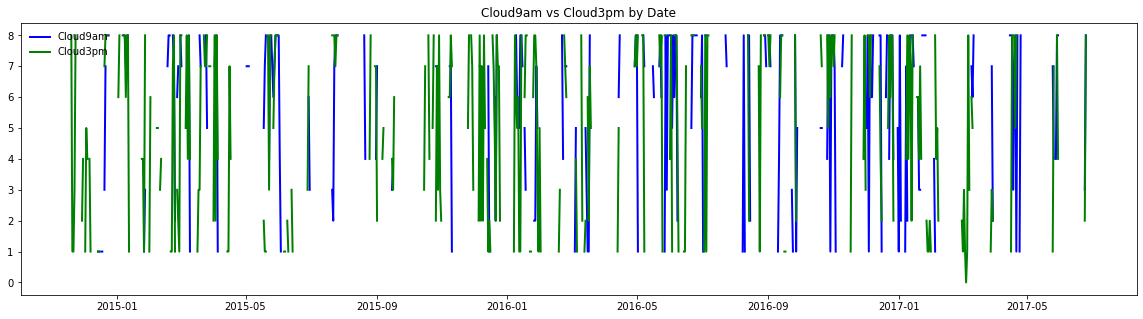

In [27]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Cloud9am'],color='blue', linewidth=2, label= 'Cloud9am')
plt.plot(df_dateplot['Date'],df_dateplot['Cloud3pm'],color='green', linewidth=2, label= 'Cloud3pm')
plt.legend(loc='upper left', frameon=False)
plt.title('Cloud9am vs Cloud3pm by Date')
plt.show()
#Cloud is the same at 5 years but there are certain months when it falls or rises.

**Temp9am and Temp3pm**

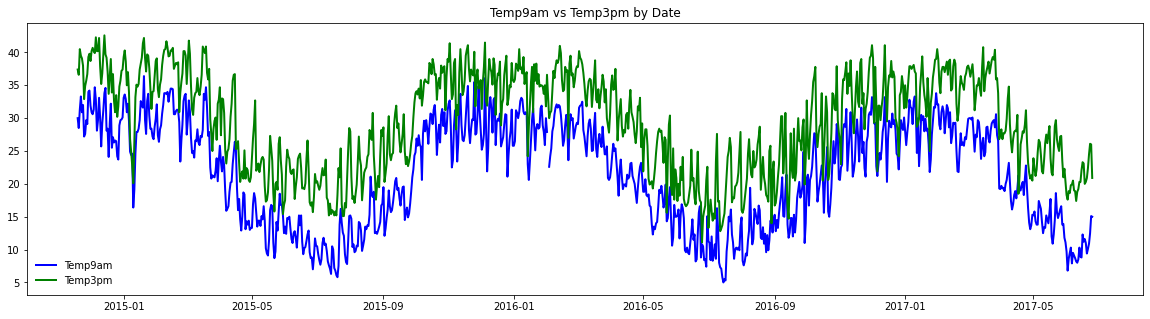

In [28]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Temp9am'],color='blue', linewidth=2, label= 'Temp9am')
plt.plot(df_dateplot['Date'],df_dateplot['Temp3pm'],color='green', linewidth=2, label= 'Temp3pm')
plt.legend(loc='lower left', frameon=False)
plt.title('Temp9am vs Temp3pm by Date')
plt.show()
# From prevois plots we know that Dec-Jan are months when the temperature is high but these are the months when the difference between temperature around 9am and 3pm is less as compare to the months of Jun-Aug when the difference is high.

### **Correlations**

**Checking Correlationship: HeatMap**

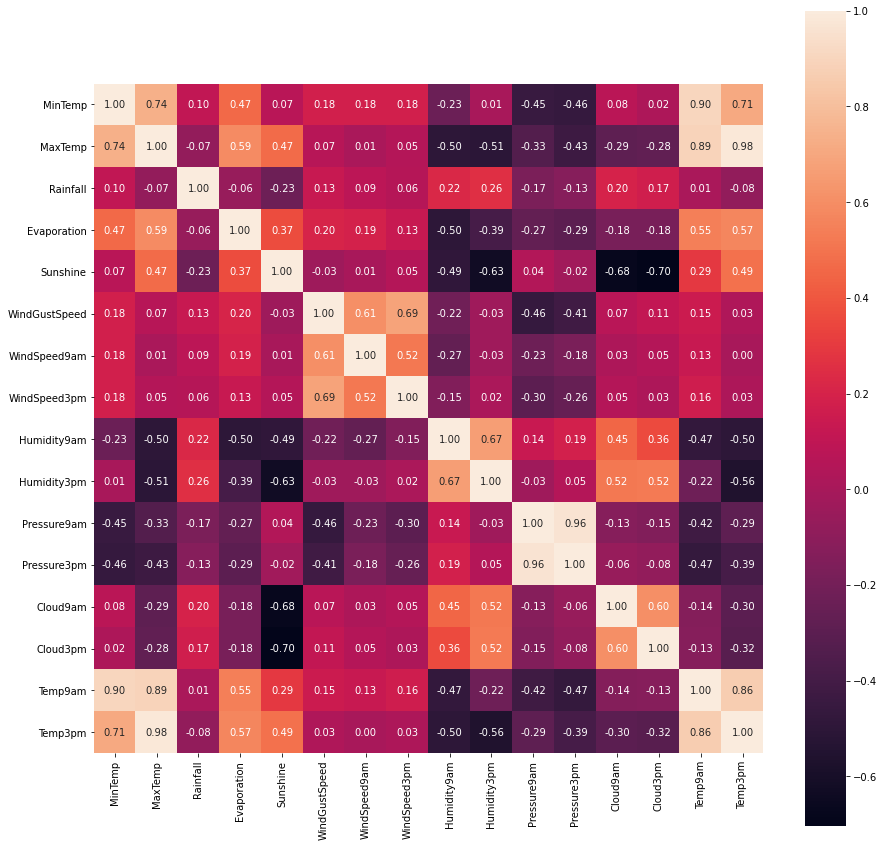

In [29]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

#MinTemp and Temp9am highly correlated.
#MinTemp and Temp3pm highly correlated.
#MaxTemp and Temp9am highly correlated.
#MaxTemp and Temp3pm highly correlated.
#Temp3pm and Temp9am highly correlated.
#Humidity9am and Humidity3pm highly correlated.

#From above correlation map we can see that:
# MinTemp and MaxTemp features are highly correlated (correlation coefficient = 0.74).
# MinTemp and Temp9am features are highly correlated (correlation coefficient = 0.89).
# MinTemp and Temp3pm features are highly correlated (correlation coefficient = 0.71).
# MaxTemp and Temp9am features are highly correlated (correlation coefficient = 0.89).
# MaxTemp and Temp3pm features are highly correlated (correlation coefficient = 0.98).
# Pressure9am and Pressure3pm features are highly correlated (correlation coefficient = 0.96).
# Temp9am and Temp3pm features are highly correlated (correlation coefficient = 0.86).


## **Preprocessing**

**Checking Null values**

In [30]:
df.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Visualizing the missing values**

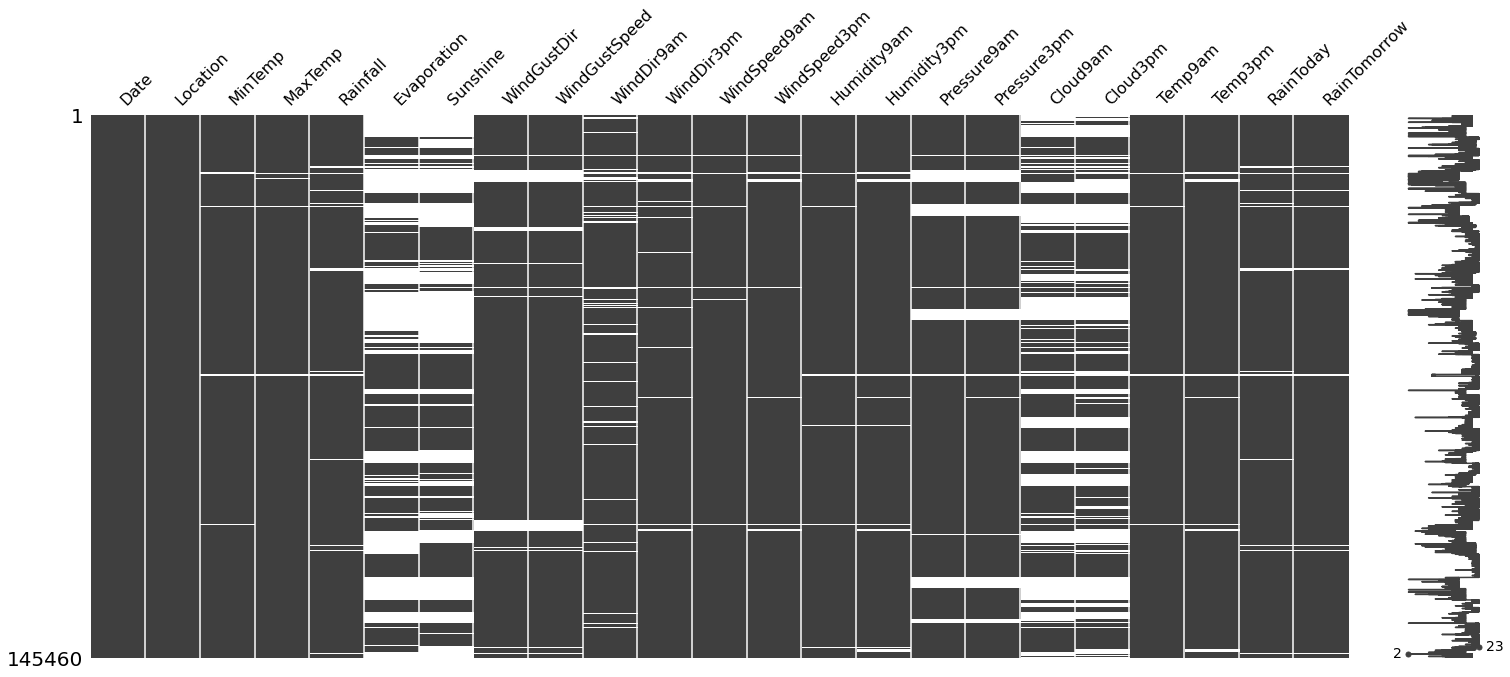

In [31]:
msno.matrix(df)
#It can be visually seen that Evaporation, Sunshine, Cloud9am and Cloud3pm has lot of missing values.

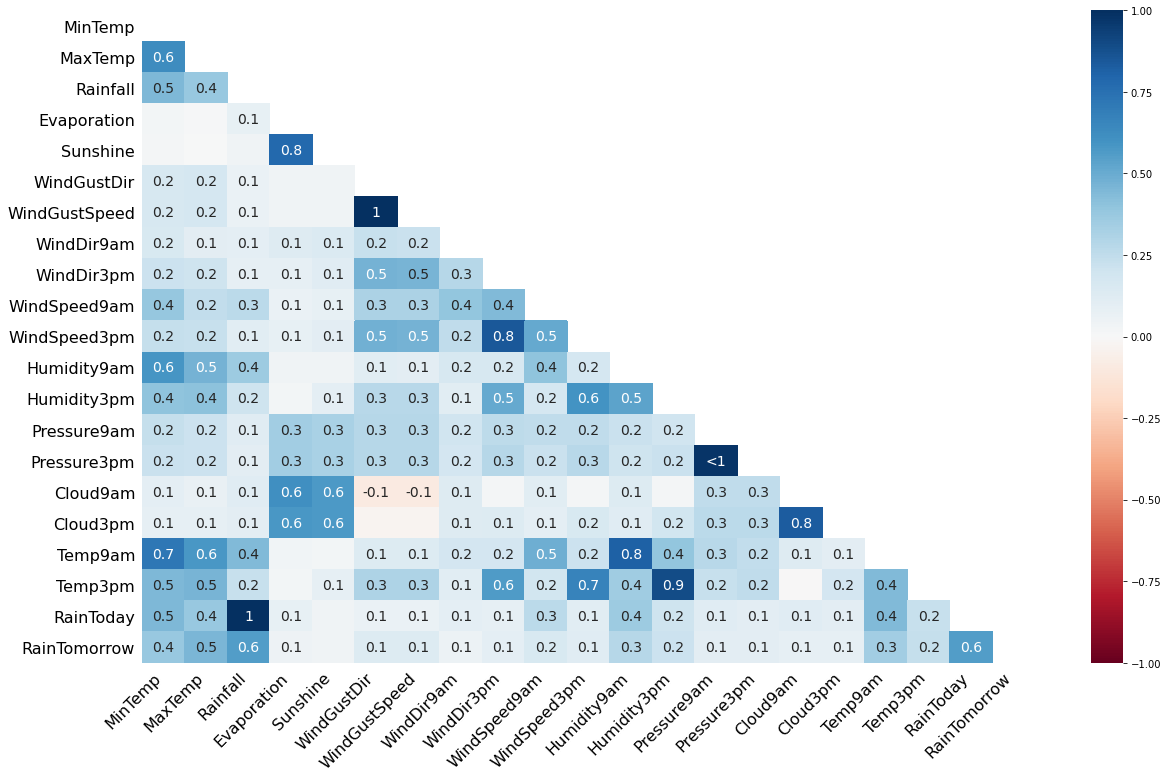

In [32]:
msno.heatmap(df)
#The graphs show that the number of missing values are high in: Sunshine, Evaporation, Cloud3pm and Cloud9am.

In [33]:
df = pd.read_csv('/content/drive/MyDrive/BigData/weatherAUS.csv')

**Dealing with the missing values**

In [34]:
#Checking percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [35]:
#Filling the missing values for continuous variables with mean
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [36]:
#Filling the missing values for categorical variables with mode

df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [37]:
#Filling the missing values for categorical variables with mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [38]:
#Checking percentage of missing data in every column

(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

**Change Categorial columns to numerical**

In [39]:
df.dtypes


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

**Changing yes and no to 1 and 0 in some columns**

In [40]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

print(df.RainToday)
print(df.RainTomorrow)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


**Encoding the categorical variables**

In [41]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [42]:
df.dtypes


Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [43]:
df.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,397,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,398,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,399,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,400,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


**Check for outliers by boxplots**

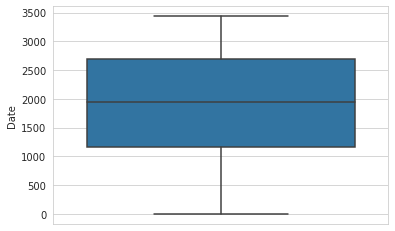

In [44]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Date"])
#There are no ouliers in Date column

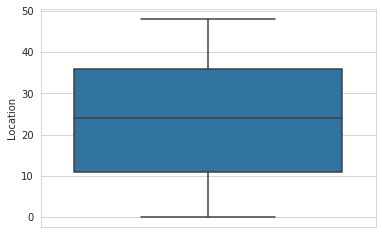

In [45]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Location"])
#There are no ouliers in Location column

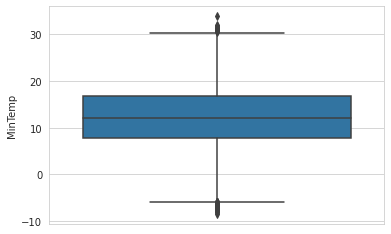

In [46]:
sns.set_style("whitegrid")
sns.boxplot(y = df["MinTemp"])
#There are ouliers in MinTemp column

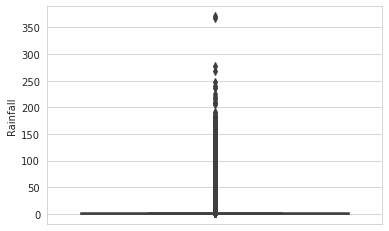

In [47]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Rainfall"])
#There are ouliers in Rainfall column

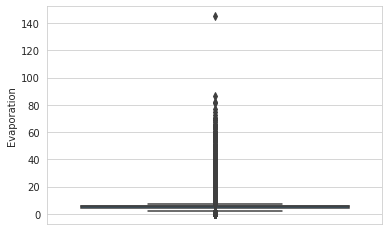

In [48]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Evaporation"])
#There are ouliers in Evaporation column

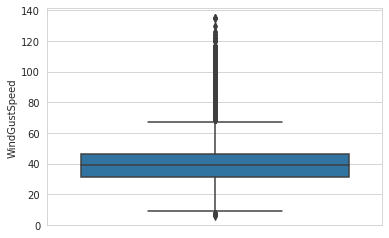

In [49]:
sns.set_style("whitegrid")
sns.boxplot(y = df["WindGustSpeed"])
#There are no ouliers in WindGustSpeed column

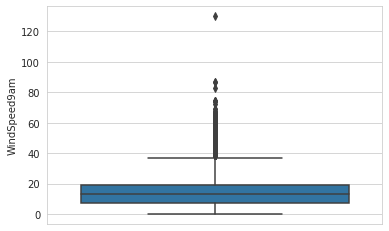

In [50]:
sns.set_style("whitegrid")
sns.boxplot(y = df["WindSpeed9am"])
#There are no ouliers in WindSpeed9am column

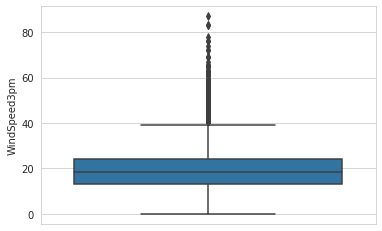

In [51]:
sns.set_style("whitegrid")
sns.boxplot(y = df["WindSpeed3pm"])
#There are ouliers in WindSpeed3pm column

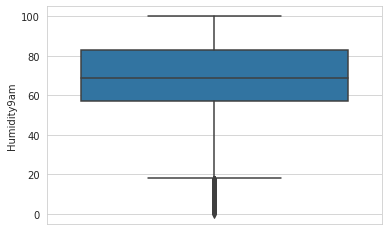

In [52]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Humidity9am"])
#There are ouliers in Humidity9am column

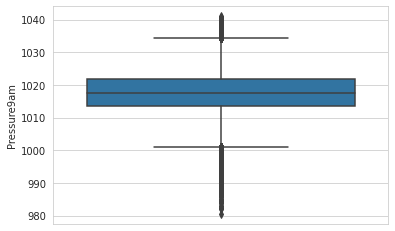

In [53]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Pressure9am"])
#There are ouliers in Pressure9am column

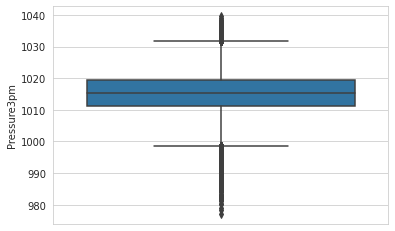

In [54]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Pressure3pm"])
#There are ouliers in Pressure3pm column

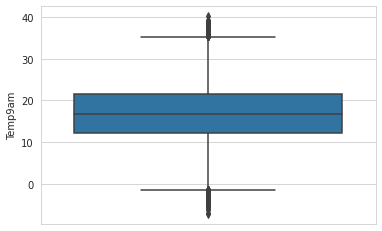

In [55]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Temp9am"])
#There are ouliers in Temp9am column

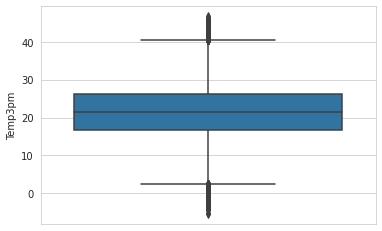

In [56]:
sns.set_style("whitegrid")
sns.boxplot(y = df["Temp3pm"])
#There are ouliers in Temp3pm column

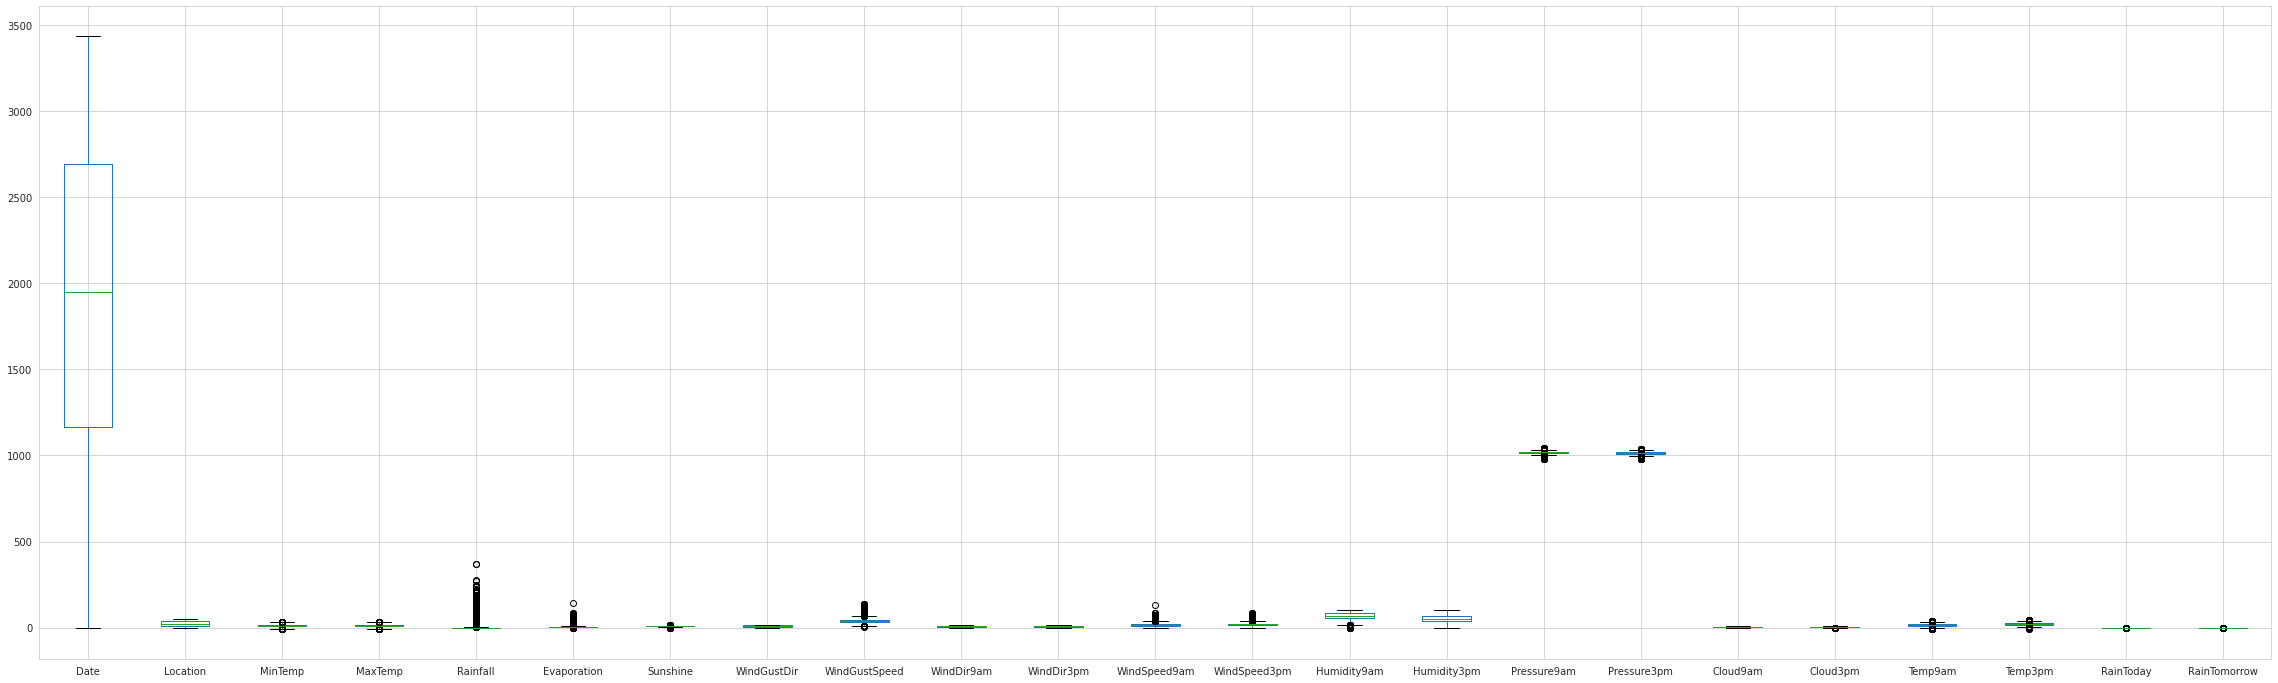

In [57]:
boxplot = df.boxplot(figsize=(40, 12))


**Remove outliers**

In [58]:
def drop_outliers(df,field_name):
    iqr = 1.5 * (np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index , inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25))].index , inplace=True)

In [59]:
drop_outliers(df,'MinTemp')
drop_outliers(df,'Rainfall')
drop_outliers(df,'Evaporation')
drop_outliers(df,'WindGustSpeed')
drop_outliers(df,'WindSpeed9am')
drop_outliers(df,'WindSpeed3pm')
drop_outliers(df,'Humidity9am')
drop_outliers(df,'Pressure9am')
drop_outliers(df,'Pressure3pm')
drop_outliers(df,'Temp9am')
drop_outliers(df,'Temp3pm')

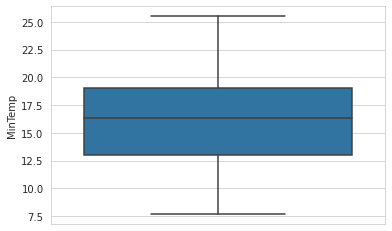

In [60]:
sns.set_style("whitegrid")
sns.boxplot(y = df["MinTemp"])
#There are no ouliers in MinTemp column after removing outliers

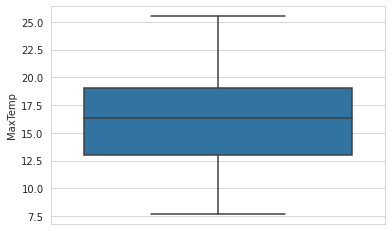

In [61]:
sns.set_style("whitegrid")
sns.boxplot(y = df["MaxTemp"])
#There are no ouliers in MaxTemp column after removing outliers

 **Balancing the data using SMOTE**

In [62]:
os = SMOTE()
x, y = os.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
count = Counter(y)
print(count)

Counter({0: 5717, 1: 5717})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Training Rainfall Prediction Model with Different Models**

In [63]:
def plot_roc_cur(fper, tper):
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='orange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [64]:
def run_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    t0 = time.time()
    model.fit(X_train,y_train,eval_set=(X_val, y_val))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_score = model.score(X_train, y_train) # train (learn) score
    val_score = model.score(X_val, y_val) # val (test) score
    time_taken = time.time()-t0
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    
    plot_roc_cur(fpr, tpr)
    print("test_acc = {}".format(accuracy))
    print("Time taken = {}".format(time_taken))
    print("val_acc",val_score)
    print("train_acc",train_score)
    print(classification_report(y_test,y_pred,digits=5))
    return accuracy,time_taken

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

Learning rate set to 0.052968
0:	learn: 0.6699346	test: 0.6718153	best: 0.6718153 (0)	total: 68.1ms	remaining: 1m 8s
1:	learn: 0.6464129	test: 0.6493477	best: 0.6493477 (1)	total: 86.9ms	remaining: 43.3s
2:	learn: 0.6266272	test: 0.6306284	best: 0.6306284 (2)	total: 105ms	remaining: 35s
3:	learn: 0.6078941	test: 0.6124388	best: 0.6124388 (3)	total: 128ms	remaining: 31.7s
4:	learn: 0.5904431	test: 0.5963892	best: 0.5963892 (4)	total: 146ms	remaining: 29.1s
5:	learn: 0.5792526	test: 0.5854403	best: 0.5854403 (5)	total: 159ms	remaining: 26.3s
6:	learn: 0.5645284	test: 0.5722463	best: 0.5722463 (6)	total: 178ms	remaining: 25.3s
7:	learn: 0.5480738	test: 0.5573186	best: 0.5573186 (7)	total: 197ms	remaining: 24.4s
8:	learn: 0.5385197	test: 0.5485161	best: 0.5485161 (8)	total: 221ms	remaining: 24.3s
9:	learn: 0.5295987	test: 0.5403989	best: 0.5403989 (9)	total: 244ms	remaining: 24.1s
10:	learn: 0.5195202	test: 0.5309190	best: 0.5309190 (10)	total: 263ms	remaining: 23.7s
11:	learn: 0.5107254	t

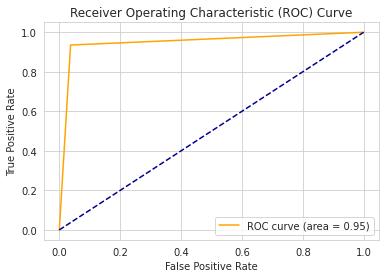

test_acc = 0.9496043315285297
Time taken = 21.010934352874756
val_acc 0.954368932038835
train_acc 0.9980007497188554
              precision    recall  f1-score   support

           0    0.94094   0.96293   0.95181      1241
           1    0.95933   0.93534   0.94718      1160

    accuracy                        0.94960      2401
   macro avg    0.95014   0.94914   0.94950      2401
weighted avg    0.94983   0.94960   0.94958      2401



In [66]:
model_CAT = CatBoostClassifier(depth=10,max_bin=60,bagging_temperature= 0.2,random_strength=5)
accuracy_CAT, tt_CAT = run_model(model_CAT, x_train, y_train, x_test, y_test,x_val,y_val)